In [1]:
import ast
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filtering with the data analyst jobs in US

df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [3]:
df_da_us = df_da_us.dropna(subset= 'salary_year_avg')
df_da_us_exploded = df_da_us.explode('job_skills')
df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [4]:
# grouping by job skills column with the aggregation salary then renaming the columns
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
df_da_skills = df_da_skills.rename(columns= {'count': 'skill_count', 'median': 'median_salary'})

In [5]:
df_da_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [ ]:
df_da_skills_high_demand = df_da_skills.head(10)

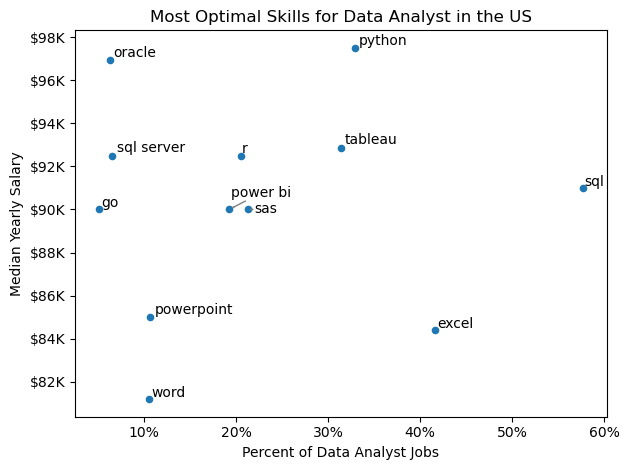

In [7]:
from adjustText import adjust_text


df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
 texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# formatting the y axis by calling plt.gca()
from matplotlib.ticker import PercentFormatter
ax = plt.gca() 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int (y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
          
# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

In [8]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [9]:
# making a single dictionary for all the technologies

df_technology = df['job_type_skills'].copy()

# df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

# technology_dict = {}
# for row in df_technology:
# 			row_dict = ast.literal_eval(row) # convert string to dictionary
# 			for key, value in row_dict.items():
# 					if key in technology_dict: # if key already exist in technology_dict, add value to existing dictionry
#      			 technology_dict[key] +=value
#  			 else:																				# if key does not exist in technology_dict, add key and value  
# 		    			technology_dict[key] = value 
            
# for key, value in technology_dict.items():
# 	 		technology_dict[key] = list(set(value))
        
# technology_dict
            

In [10]:
# copied from internet (making a single dictionary for all the technologies)

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))




In [11]:
technology_dict

{'analyst_tools': ['tableau',
  'looker',
  'powerpoint',
  'sharepoint',
  'spss',
  'microstrategy',
  'cognos',
  'sas',
  'qlik',
  'powerbi',
  'outlook',
  'spreadsheet',
  'word',
  'dax',
  'esquisse',
  'visio',
  'nuix',
  'ssrs',
  'alteryx',
  'excel',
  'sap',
  'msaccess',
  'ssis',
  'power bi',
  'datarobot',
  'splunk',
  'ms access',
  'sheets'],
 'programming': ['java',
  'c#',
  'ruby',
  'html',
  'kotlin',
  'lisp',
  'clojure',
  'python',
  'bash',
  'vba',
  't-sql',
  'sas',
  'c',
  'sql',
  'f#',
  'powershell',
  'golang',
  'php',
  'dart',
  'javascript',
  'visual basic',
  'sass',
  'mongo',
  'crystal',
  'ocaml',
  'mongodb',
  'scala',
  'haskell',
  'shell',
  'lua',
  'groovy',
  'objective-c',
  'rust',
  'r',
  'assembly',
  'go',
  'perl',
  'julia',
  'nosql',
  'pascal',
  'visualbasic',
  'cobol',
  'delphi',
  'vb.net',
  'css',
  'elixir',
  'erlang',
  'typescript',
  'fortran',
  'c++',
  'no-sql',
  'matlab',
  'swift',
  'solidity',
  '

In [29]:
# converting to dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

In [31]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

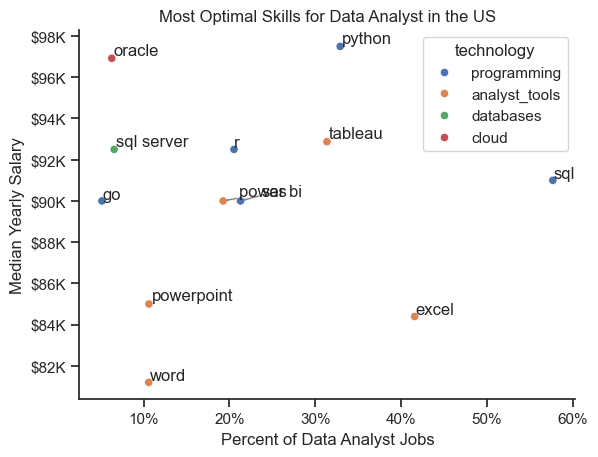

In [43]:
from adjustText import adjust_text

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(data = df_plot, x = 'skill_percent', y = 'median_salary', hue = 'technology')
sns.despine()
sns.set_theme(style ='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
 texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# formatting the y axis by calling plt.gca()
from matplotlib.ticker import PercentFormatter
ax = plt.gca() 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int (y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
          
# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

# Adjust layout and display plot 
plt.show()